output4-3.csv

參考網址1:
https://datascience.stackexchange.com/questions/20415/what-should-be-the-order-of-class-names-in-sklearn-tree-export-function-beginne  
參考網址2:
https://zhuanlan.zhihu.com/p/27538989

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
#train_data = pd.read_csv("train.csv")
#pickle.dump(train_data,open("train_csv.pkl","wb" ))

In [2]:
cross=open('train_csv.pkl','rb')
train_data=pickle.load(cross)

In [3]:
train_data.columns

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey'],
      dtype='object')

In [4]:
df=train_data.reindex(columns=['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg','etymd',
                               'hcefg', 'insfg', 'iterm', 'locdt',
                               'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey','fraud_ind'])

In [5]:
np.shape(df)

(1521787, 21)

In [6]:
df=df.dropna()
#df=df.fillna("Unknown")

In [7]:
np.shape(df)

(1521787, 21)

In [8]:
df.replace({'N':0,'Y':1},inplace=True)

In [9]:
X=df[['conam', 'contp', 'csmcu', 'ecfg','etymd',
    'hcefg', 'insfg','loctm','scity', 'stocn', 'stscd']]
y=df[['fraud_ind']]

In [10]:
np.shape(X),np.shape(y)

((1521787, 11), (1521787, 1))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)#括號裡面還可加test_size=0.33

In [12]:
X_train.shape,X_test.shape

((1141340, 11), (380447, 11))

In [13]:
y_train.shape,y_test.shape

((1141340, 1), (380447, 1))

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 3)#括號裡面可加max_depth = 3之類
clf = clf.fit(X_train, y_train)

In [15]:
with open("yes-no.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 5,
                              impurity = True,
                              feature_names = list(X_train),
                              class_names =['0','1'],#數字由小到大輸入
                              rounded = True,
                              filled= True )

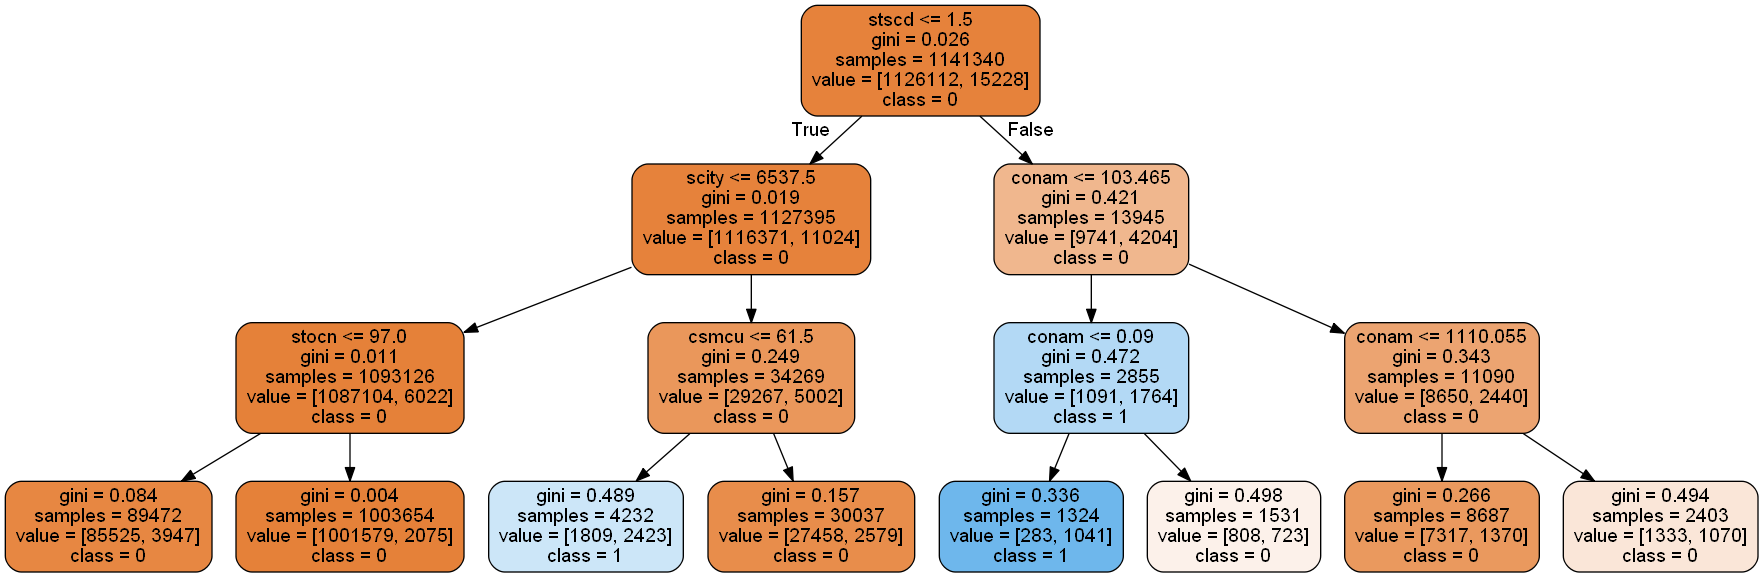

In [16]:
from subprocess import check_call
check_call(['C:/Program Files (x86)/Graphviz2.38/bin/dot','-Tpng','yes-no.dot','-o','yes-no.png'])
#check_call(['dot','-Tpng','safe-loans.dot','-o','safe-loans.png'])

from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
img = Image.open("yes-no.png")
draw = ImageDraw.Draw(img)
img.save('output.png')
PImage("output.png")

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))

0.9877959347819801

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    375320
          1       0.63      0.23      0.34      5127

avg / total       0.98      0.99      0.98    380447



In [19]:
test_data = pd.read_csv("test.csv")

In [20]:
test_data.replace({'N':0,'Y':1},inplace=True)

In [21]:
print(test_data.isnull().any())

acqic        False
bacno        False
cano         False
conam        False
contp        False
csmcu        False
ecfg         False
etymd        False
flbmk         True
flg_3dsmk     True
hcefg        False
insfg        False
iterm        False
locdt        False
loctm        False
mcc          False
mchno        False
ovrlt        False
scity        False
stocn        False
stscd        False
txkey        False
dtype: bool


In [25]:
#locdt授權日期,txkey交易序號，我認為不重要。然後'flg_3dsmk'跟'flbmk'有空值，所以剃掉變數。
test_data_pick=test_data[['conam', 'contp', 'csmcu', 'ecfg','etymd',
    'hcefg', 'insfg','loctm','scity', 'stocn', 'stscd']]

In [26]:
np.shape(test_data_pick)

(421665, 11)

In [27]:
fi=clf.predict(test_data_pick)

In [28]:
len(fi)

421665

In [29]:
k=0
for i in range(len(fi)):
    if fi[i]==1:
        k+=1
print(k)
print(k/421665)

2139
0.005072747323111949


In [30]:
kkk=pd.DataFrame(fi)
kkk.rename(columns={kkk.columns[0]:"fraud_ind"}, inplace=True)

In [31]:
len(kkk)

421665

In [32]:
idx=test_data[['txkey']]

In [33]:
result=pd.merge(idx,kkk,left_index=True,right_index=True,how='outer')

In [34]:
result.to_csv("output4-3.csv",index=False,sep=',')